In [1]:
# The goal of the project is to predict whether the subject has 
# epileptic seizure or not based on the output from EEG. 
# This would be a classification project. 
# The data set is available at https://archive.ics.uci.edu/ml/datasets/Epileptic+Seizure+Recognition. 
# Total number of records are 11,500 and number of attributes is 179

In [2]:
%matplotlib inline
import pandas as pd 
import urllib2 as url
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats

In [3]:
#Load the Data from the website.
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00388/data.csv",index_col=[0])
# The first column does nto have a Header. It also happens to be the column we want to index
data.index.name= "ID" 

<h3> Exploratory Data Analysis </h3>

In [4]:
# Check Top 5 rows
data.head(5)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
ID,,,,,,,,,,,,,,,,,,,,,
X21.V1.791,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
X15.V1.924,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,5
X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [5]:
# Check the shape of the data
data.shape

(11500, 179)

In [6]:
#Name of the columns
data.columns

Index([u'X1', u'X2', u'X3', u'X4', u'X5', u'X6', u'X7', u'X8', u'X9', u'X10', 
       ...
       u'X170', u'X171', u'X172', u'X173', u'X174', u'X175', u'X176', u'X177',
       u'X178', u'y'],
      dtype='object', length=179)

In [7]:
data.info()
# OBSERVATIONS based on the result
# All the attributes have data type of Integer.
# No missing values

<class 'pandas.core.frame.DataFrame'>
Index: 11500 entries, X21.V1.791 to X16.V1.210
Columns: 179 entries, X1 to y
dtypes: int64(179)
memory usage: 15.7+ MB


In [8]:
data.describe()
# OBSERVATIONS based on the result
# The values of all the attributes have a negative value and go from a  min of -1700 to + 1800

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,...,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,3.000000
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,...,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,1.414275
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,...,-1867.000000,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.000000,-1829.000000,1.000000
25%,-54.000000,-55.000000,-54.000000,-54.000000,-54.000000,-54.000000,-54.000000,-55.00000,-55.00000,-54.000000,...,-55.000000,-56.000000,-56.000000,-56.000000,-55.000000,-56.000000,-55.000000,-55.000000,-55.000000,2.000000
50%,-8.000000,-8.000000,-7.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.00000,-7.00000,-7.000000,...,-9.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.000000,-9.000000,-9.000000,-9.000000,3.000000
75%,34.000000,35.000000,36.000000,36.000000,35.000000,36.000000,35.000000,36.00000,36.00000,35.250000,...,34.000000,34.000000,33.000000,33.000000,34.000000,34.000000,34.000000,34.000000,34.000000,4.000000
max,1726.000000,1713.000000,1697.000000,1612.000000,1518.000000,1816.000000,2047.000000,2047.00000,2047.00000,2047.000000,...,1777.000000,1472.000000,1319.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000,5.000000


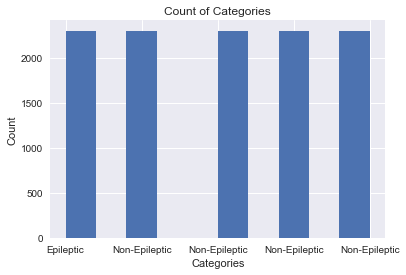

In [9]:
_ = plt.hist(data["y"])
plt.xlabel("Categories" )
plt.ylabel("Count" )
plt.title("Count of Categories")
plt.xticks( np.arange(1,6,1), ('Epileptic', 'Non-Epileptic', 'Non-Epileptic', 'Non-Epileptic', 'Non-Epileptic') )
plt.show()
# OBSERVATIONS based on the result
# All classes are equally distributed.

c:\python27\lib\site-packages\matplotlib\__init__.py:830: MatplotlibDeprecationWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  mplDeprecation)


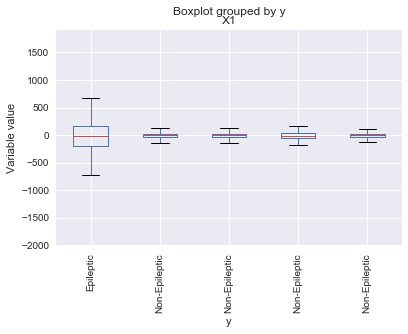

In [10]:
#Box Plot by each attirbute and Group by Y class
data.boxplot(column="X1",by="y",rot=90)
plt.ylabel("Variable value" )
plt.xticks( np.arange(1,6,1), ('Epileptic', 'Non-Epileptic', 'Non-Epileptic', 'Non-Epileptic', 'Non-Epileptic') )
plt.show()
# OBSERVATIONS based on the result
# Observations belonging to Class 1 have high variance.

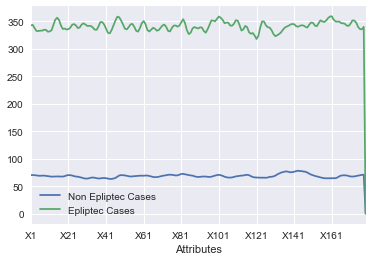

In [11]:
# Check if variance is high for all attributes for class =1
non_epi = data[data.y <> 1].describe().loc["std"]
epi = data[data.y == 1].describe().loc["std"]
non_epi.plot(label = "Non Epliptec Cases",legend = True)
epi.plot(label = "Epliptec Cases",legend = True)
plt.xlabel("Attributes")
plt.show()
# It can be clearly seen that Epliptec cases (Y=1) have a high variation across all attributes

<h3> Applying Inferential Statistics </h3>

In [12]:
# Check if the  independent attributes are normally distributed
data_independent = data.drop("y", axis=1)
for col in data_independent:
    statistic, p_value = stats.normaltest(data_independent[col])
    print "Variable: ", col , "-", statistic, "-" , p_value

# None of the attributes are normally distirbuted.

Variable:  X1 - 3112.30027523 - 0.0
Variable:  X2 - 3032.77381341 - 0.0
Variable:  X3 - 3310.59012934 - 0.0
Variable:  X4 - 3217.65871884 - 0.0
Variable:  X5 - 2838.20155894 - 0.0
Variable:  X6 - 2710.01448354 - 0.0
Variable:  X7 - 2785.06007387 - 0.0
Variable:  X8 - 2903.43822722 - 0.0
Variable:  X9 - 3320.69805312 - 0.0
Variable:  X10 - 2833.34608787 - 0.0
Variable:  X11 - 2832.13439422 - 0.0
Variable:  X12 - 2717.11088045 - 0.0
Variable:  X13 - 2953.86564122 - 0.0
Variable:  X14 - 3901.98602712 - 0.0
Variable:  X15 - 4408.03772292 - 0.0
Variable:  X16 - 4556.91517421 - 0.0
Variable:  X17 - 4134.36456123 - 0.0
Variable:  X18 - 4011.30255389 - 0.0
Variable:  X19 - 3484.44046223 - 0.0
Variable:  X20 - 2975.27651021 - 0.0
Variable:  X21 - 2770.24555184 - 0.0
Variable:  X22 - 2996.68275136 - 0.0
Variable:  X23 - 3086.04316202 - 0.0
Variable:  X24 - 3057.35874661 - 0.0
Variable:  X25 - 3328.38189817 - 0.0
Variable:  X26 - 2934.97088285 - 0.0
Variable:  X27 - 2848.54563307 - 0.0
Variable: 

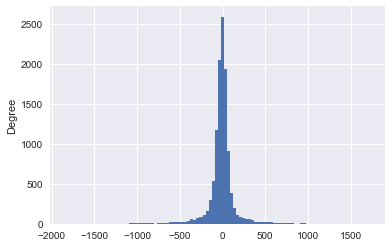

In [13]:
# Let us plot a histogram of one attributes.
_ = data_independent["X1"].plot(kind="hist",bins=100)
# Visually the variable looks normally distributed.

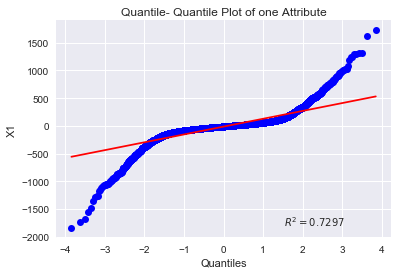

In [14]:
# Let us do a QQ Plot
stats.probplot(data_independent["X1"], dist='norm', plot=plt)
plt.xlabel('Quantiles')
plt.ylabel('X1')
plt.title ("Quantile- Quantile Plot of one Attribute")
plt.show()
# TODO: 4th movement- Kurtosis.
# TODO: try to find what the variables stand for.

In [15]:
# Calculate Kurtosis
for col1 in data_independent:
    print col1," - ",stats.kurtosis(data_independent[col1])

X1  -  19.0611932036
X2  -  18.2928199553
X3  -  18.4027045409
X4  -  18.3769456378
X5  -  17.737606333
X6  -  18.3765345279
X7  -  19.1466644963
X8  -  20.7219836039
X9  -  22.8007796461
X10  -  20.1583467644
X11  -  17.6858338111
X12  -  17.3692749103
X13  -  19.4135608448
X14  -  22.090855244
X15  -  22.9274403265
X16  -  22.8074264548
X17  -  20.8352582311
X18  -  20.8715695295
X19  -  18.8811750657
X20  -  17.3756786664
X21  -  17.0493219511
X22  -  19.2158155236
X23  -  20.8540517853
X24  -  20.1661167802
X25  -  21.5771945661
X26  -  19.296372085
X27  -  18.49559505
X28  -  19.5204268059
X29  -  20.7793757117
X30  -  22.32738138
X31  -  19.505150502
X32  -  16.5276615262
X33  -  16.1688666611
X34  -  17.1686369135
X35  -  17.6148107281
X36  -  17.5672818933
X37  -  18.0750246169
X38  -  19.0528679236
X39  -  18.0493164228
X40  -  16.3397856751
X41  -  16.2224997688
X42  -  16.6449990291
X43  -  16.0892207338
X44  -  18.3181237333
X45  -  20.7478071686
X46  -  21.738939484
X47  -

In [17]:
# Check for corelation between  independent attributes
checked_cols =[]
df_corr=data_independent.corr()
for idx in df_corr.index:
    for col in df_corr:
        if idx <> col :
            if not(idx+"-"+col in checked_cols):
                checked_cols.append(col+"-"+idx)
                corr=df_corr[idx][col]
                if corr >0.8 :
                    print idx," - ",col , " - :" , corr

X1  -  X2  - : 0.947728563382
X1  -  X3  - : 0.808191568857
X2  -  X3  - : 0.944622619007
X3  -  X4  - : 0.939521899995
X4  -  X5  - : 0.938635772132
X5  -  X6  - : 0.941266904074
X6  -  X7  - : 0.942731943499
X7  -  X8  - : 0.943499364474
X7  -  X9  - : 0.804300313349
X8  -  X9  - : 0.947479311107
X8  -  X10  - : 0.810992233444
X9  -  X10  - : 0.946728960851
X9  -  X11  - : 0.802872225449
X10  -  X11  - : 0.944024309668
X11  -  X12  - : 0.940959320036
X12  -  X13  - : 0.940121519252
X13  -  X14  - : 0.946333474725
X13  -  X15  - : 0.815994687737
X14  -  X15  - : 0.950880274711
X14  -  X16  - : 0.822775714107
X15  -  X16  - : 0.949805416744
X15  -  X17  - : 0.805523833956
X16  -  X17  - : 0.940689621967
X17  -  X18  - : 0.934157479615
X18  -  X19  - : 0.935212968741
X19  -  X20  - : 0.93953832407
X20  -  X21  - : 0.936508809461
X21  -  X22  - : 0.935541746408
X22  -  X23  - : 0.937018025109
X23  -  X24  - : 0.940775571325
X24  -  X25  - : 0.938594073471
X25  -  X26  - : 0.933712063024


There is a high degree of corelation between the variables. Let us try to do a PCA analysis.

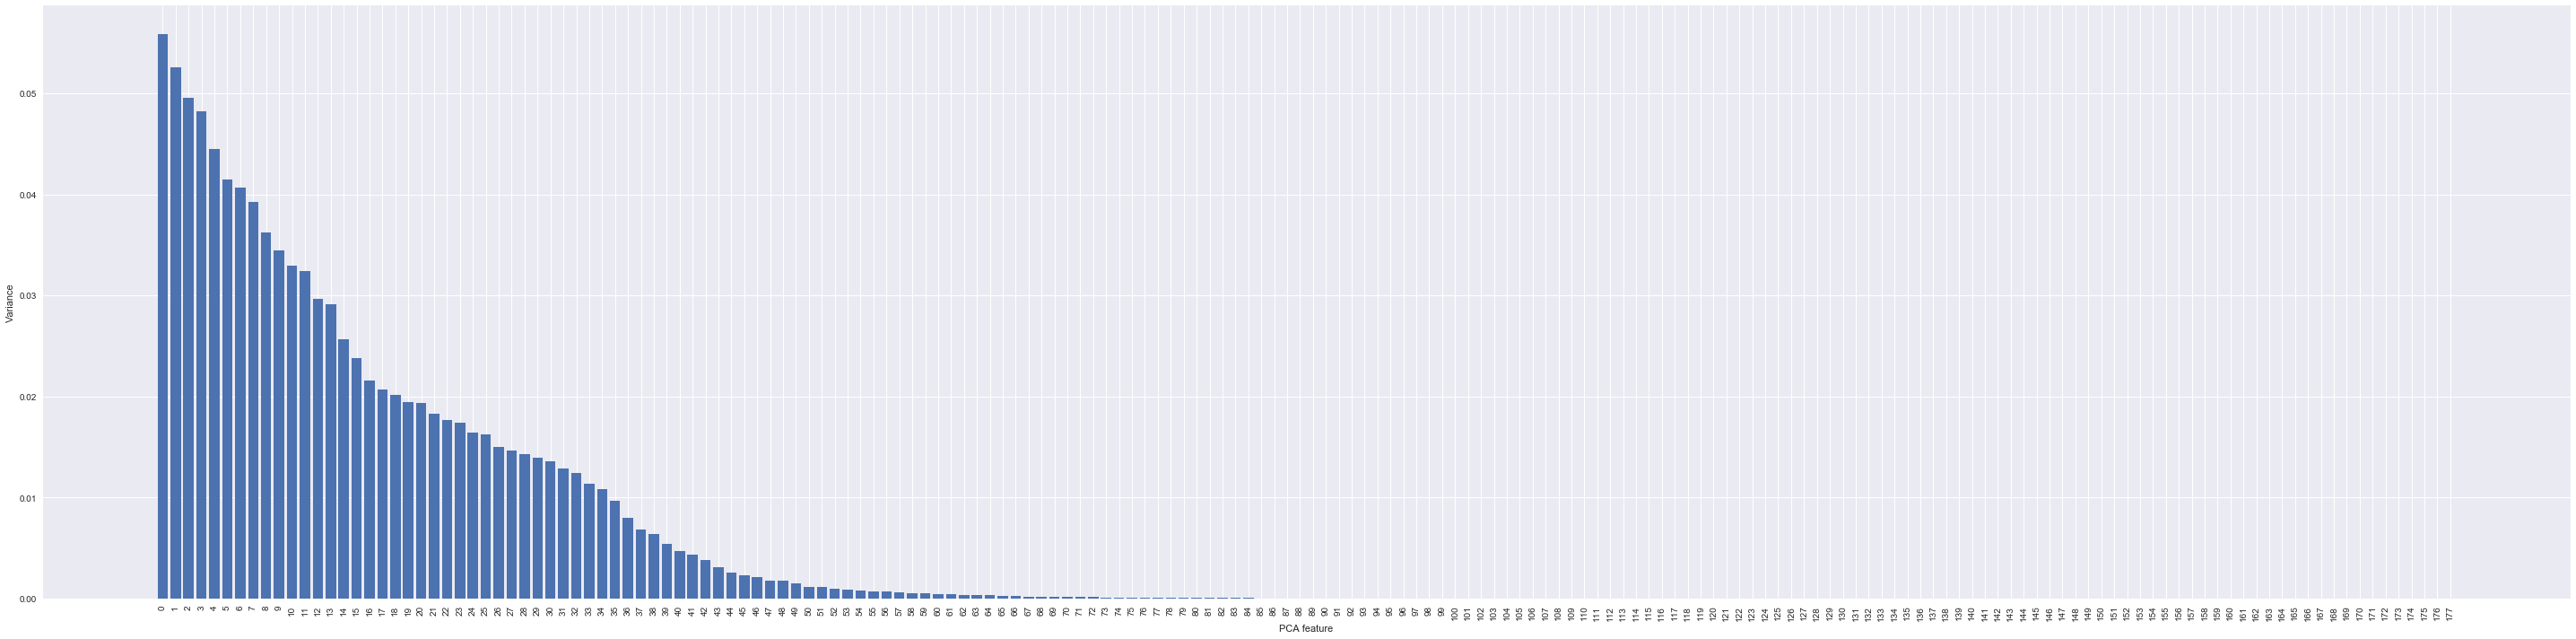

In [34]:
from sklearn.decomposition import PCA

ind_array = np.array(data_independent)
pca = PCA()
pca.fit_transform(ind_array)     
features = range(pca.n_components_)
plt.figure(figsize=(40,10))
plt.bar(features, pca.explained_variance_ratio_)
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features, rotation=90)
plt.tight_layout()
plt.show()

In [58]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve

lr = LogisticRegression()
# Replace the labels 3,4,5 with 2
y = data.y.replace(3,2).replace(4,2).replace(5,2)
X_train, X_test, y_train, y_test = train_test_split(data_independent, y,\
                                                    test_size = 0.25, random_state=42)

lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)


print "Score:", lr.score(X_test,y_test)
print "Confusion Matrix:\n" , confusion_matrix(y_test, y_pred)
print "Classification Report:\n", classification_report(y_test, y_pred)

Score: 0.821565217391
Confusion Matrix:
[[  90  500]
 [  13 2272]]
Classification Report:
             precision    recall  f1-score   support

          1       0.87      0.15      0.26       590
          2       0.82      0.99      0.90      2285

avg / total       0.83      0.82      0.77      2875



In [63]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = lr.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

ValueError: Data is not binary and pos_label is not specified

In [62]:

np.array(y_test)

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

In [ ]:
#TODO: 
# Perform Linear Regression using PCA.
# Fine tune Hyper Parameters using Grid Search 
# Use Decsion Trees, Random Forest
# Use piple line
# Upsampling, downsampling, SMOTE (Synthetic data)
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV